# Hands-On Session 1: Random Variate Generation

In this notebook, we'll explore various methods for generating random variates.

## 1. Random Number Generation


#### What are random numbers?

It is a random sequence of numbers obtained from a stochastic process.
Random numbers need to be independent such that there is no correlation between the successive numbers and have equal probability


In [7]:
#We will start by generating random numbers from a uniform distribution.

In [8]:
#pip install numpy matplotlib scipy

import numpy as np
import random
import matplotlib.pyplot as plt

# Generate random numbers from a discrete uniform distribution (e.g., 1 to 6)..Eg:Rolling a die
def generate_discrete_uniform_numbers(low, high, size=10):
    return np.random.randint(low, high+1, size)

discrete_uniform_numbers = generate_discrete_uniform_numbers(1, 6, 10)
print("Discrete uniform random numbers:", discrete_uniform_numbers)

Discrete uniform random numbers: [3 3 2 3 3 3 6 6 5 4]


## 2.Random Number Generators

#### True Random Number Generators:
TRNGs rely on physical processes to produce randomness.Eg:atmospheric noise, thermal noise


#### Pseudo Random Number Generators:
PRNGs use mathematical algorithms to generate a sequence of numbers that appear random. However, these numbers are not truly random because they are generated based on an initial seed value.

#### Random Number Seed

A random seed is a number (or vector) used to initialize a pseudorandom number generator.
Used as starting point for generating random number sequence


In [9]:
#Let's see with examples

def true_random_numbers(size=5):
    # Here we'll use np.random.uniform which is not truly random but often used for demonstration
    return np.random.uniform(0, 1, size)

# Generate True Random Numbers
true_randoms = true_random_numbers(5)
print("True Random Numbers (Simulated):", true_randoms)

# Generate True Random Numbers
true_randoms = true_random_numbers(5)
print("True Random Numbers (Simulated):", true_randoms)

True Random Numbers (Simulated): [0.76675726 0.32822243 0.76939925 0.45688791 0.68579175]
True Random Numbers (Simulated): [0.12571292 0.32638303 0.44801415 0.49737604 0.7184883 ]


In [10]:
# Pseudo-Random Number Generator with Seed
def pseudo_random_numbers(seed, size=5):
    random.seed(seed)  # Initialize the PRNG with a seed
    return [random.random() for _ in range(size)]

size=5
seed=10

# Generate Pseudo-Random Numbers with a Seed
pseudo_randoms = pseudo_random_numbers(seed, size)
print("Pseudo-Random Numbers with Seed:", pseudo_randoms)

# Generate Pseudo-Random Numbers with the Same Seed Again
pseudo_randoms_repeated = pseudo_random_numbers(seed, size)
print("Pseudo-Random Numbers with Seed (Repeated):", pseudo_randoms_repeated)

Pseudo-Random Numbers with Seed: [0.5714025946899135, 0.4288890546751146, 0.5780913011344704, 0.20609823213950174, 0.81332125135732]
Pseudo-Random Numbers with Seed (Repeated): [0.5714025946899135, 0.4288890546751146, 0.5780913011344704, 0.20609823213950174, 0.81332125135732]


#### Notice that if we repeat the same seed value we get the same result since we fixed the so-called seed of the simulation.

In [11]:
size=5
seed=12
pseudo_randoms_repeated = pseudo_random_numbers(seed, size)
print("Pseudo-Random Numbers with Seed=12:", pseudo_randoms_repeated)

Pseudo-Random Numbers with Seed=12: [0.4745706786885481, 0.6574725026572553, 0.6664104711248381, 0.14260035292536777, 0.01086044309006795]


In [12]:
pseudo_randoms_repeated = pseudo_random_numbers(seed, size)
print("Pseudo-Random Numbers with Seed=12 again:", pseudo_randoms_repeated)

Pseudo-Random Numbers with Seed=12 again: [0.4745706786885481, 0.6574725026572553, 0.6664104711248381, 0.14260035292536777, 0.01086044309006795]


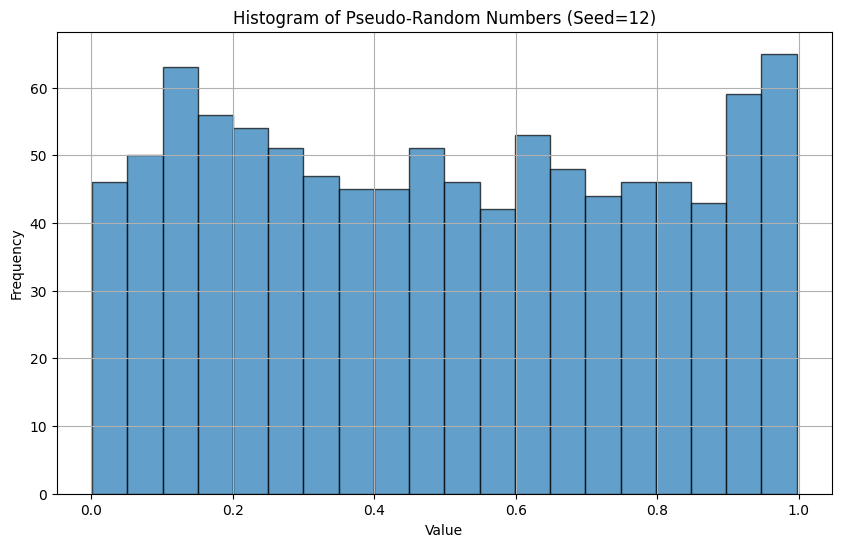

In [13]:
#checking for uniformity

true_randoms = true_random_numbers(1000)

# Create a histogram to demonstrate uniformity
plt.figure(figsize=(10, 6))
plt.hist(true_randoms, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Pseudo-Random Numbers (Seed=12)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

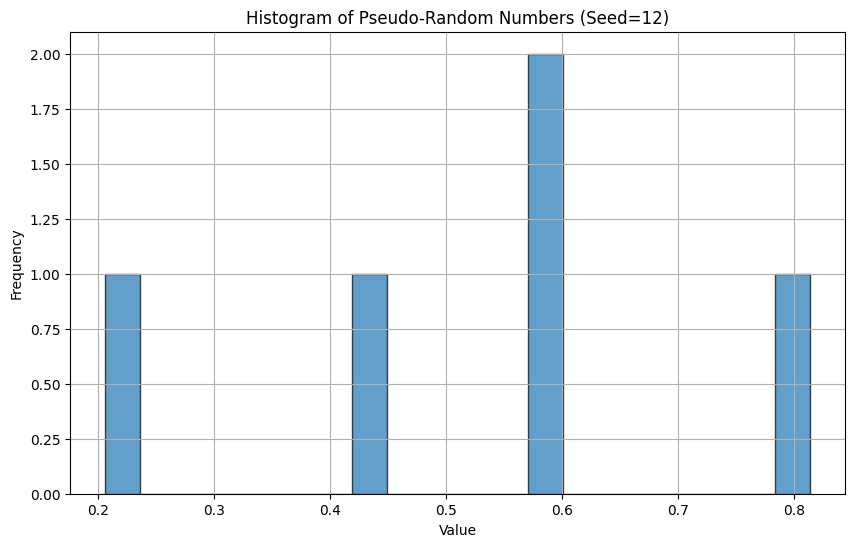

In [14]:
size=1000
seed=42
pseudo_randoms_repeated = pseudo_random_numbers(seed, size)

# Create a histogram to demonstrate uniformity
plt.figure(figsize=(10, 6))
plt.hist(pseudo_randoms, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Pseudo-Random Numbers (Seed=12)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We can see that the histograms are reasonably flat and therefore the assumption of uniformity seems to hold.

## 2.Random Variates

Random Variate: A sample or observation generated from a specific probability distribution.

Probability Distribution: Describes how the values of a random variable are distributed.

### 3.1 Acceptance-Rejection Method

Let's generate Poisson Random Variates


## Poisson Distribution

The Poisson distribution's probability mass function (PMF) is given by:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$
Where  is the average rate (mean) of occurrences, and
k is the number of occurrences.

Acceptance Criterion: We accept or reject the proposed sample based on the probability density of the target distribution (Poisson) and the proposal distribution (Exponential).

The procedure for generating a Poisson random variate \( N \) using the acceptance-rejection method is as follows:

1. Set n=0, P=1
2. Generate a random number Rn+1, and replace P by P=P * Rn+1
3. If P < exp(-α), then accept N=n.
4. Otherwise, reject the current n, increase n by one, and return to step 2

​


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_acceptance_rejection(alpha, size=2):
    variates = []

    for _ in range(size):
        n = 0
        P = 1
        print(f"Variate generation:")

        while True:
            R = np.random.uniform(0, 1)
            print(f"Generate random number R = {R:.4f}")
            P *= R
            print(f"  Update P = {P:.4f}")

            if P < np.exp(-alpha):
                variates.append(n)
                print(f"  P < exp(-alpha) ({P:.4f} < {np.exp(-alpha):.4f})")
                print(f"  Accept N = {n}")
                break
            else:
                n += 1
                print(f"  P >= exp(-alpha) ({P:.4f} >= {np.exp(-alpha):.4f})")
                print(f"  Reject N = {n-1}, increment n to {n}")

    return variates



In [16]:
# Parameters
alpha = 0.2  # Poisson parameter
size = 5  # Number of samples to generate

# Print the threshold value
print(f"Threshold (exp(-alpha)): {np.exp(-alpha):.4f}")

# Generate Poisson variates
poisson_samples = poisson_acceptance_rejection(alpha, size)

# Print the generated Poisson variates
print("\nGenerated Poisson Variates:")
print(poisson_samples)

Threshold (exp(-alpha)): 0.8187
Variate generation:
Generate random number R = 0.5994
  Update P = 0.5994
  P < exp(-alpha) (0.5994 < 0.8187)
  Accept N = 0
Variate generation:
Generate random number R = 0.2013
  Update P = 0.2013
  P < exp(-alpha) (0.2013 < 0.8187)
  Accept N = 0
Variate generation:
Generate random number R = 0.0708
  Update P = 0.0708
  P < exp(-alpha) (0.0708 < 0.8187)
  Accept N = 0
Variate generation:
Generate random number R = 0.8629
  Update P = 0.8629
  P >= exp(-alpha) (0.8629 >= 0.8187)
  Reject N = 0, increment n to 1
Generate random number R = 0.7593
  Update P = 0.6552
  P < exp(-alpha) (0.6552 < 0.8187)
  Accept N = 1
Variate generation:
Generate random number R = 0.5438
  Update P = 0.5438
  P < exp(-alpha) (0.5438 < 0.8187)
  Accept N = 0

Generated Poisson Variates:
[0, 0, 0, 1, 0]


As seen to generate 5 poisson variates we had to generate 7 random variables.

In long run, the generation of Poisson variates requires
some overhead!

Generated Poisson Variates:
[ 6  5  3  4  3  4  4  2  7  8  2 11  5  9  8  3  6  2  7  6  7  8  2  5
  4  5  6  2  3  3  9  5  9  3  5  3  5  5  9  6  2  4  4 10  3  6  5  5
  1  2  4  2  6  4  3  3  2  5  3  8  6  5  2  7 10  8  9  4  9  5  6  6
 14  3  7  7  4  4  3  3  7  6  4  1  4  7  1  4  7  4  3  0  5  5  2  2
  4  6 11  1  7  7  2 11  6  5  4  8  3 11  2  8  5  5  5 12  9  3  4  2
  6  4  2  7  2  5  6  4  9  5  7  6  7  5  7  5  5  4  8  3  8  3  6  6
  4  7  7  6  3  5  8  6  5 10  4  8  5  6  4  3  2  8  2  5 12  5  4  5
  3  7  4 10  6  3  4  4  4  3  1  6  5  4  3  9  4  5  8  6  3  5  1  6
  3  1  3  2  4  2 11  3  7  4  3  2 11  2 10  6  4  5  5  4  4  9  8  6
  5  2  2  1  6 10  3  5  1  4  6  5  8  5  6  2  3  4  4  6  2  3  4  3
  5  2  5  9  5  4  6  7  5 10  5  1  3  2  6  6 12  2  6  6  4  5  4  3
  9  2  3  7  6  4  7  7  5  9  6  6  5  7  5  7  5  2  4  5  5  1  1  6
  5  4  4  7  5  4  6  5  7  5  4  3  2  4  5 11  8  2  3  3  6  2  6  0
  6  4  1  3  5  3  3  

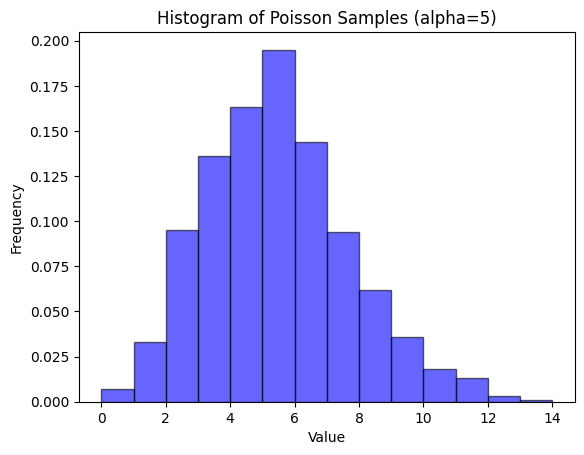

In [17]:
def poisson_acceptance_rejection(alpha, size=10):
    samples = []
    for _ in range(size):
        n = 0
        P = 1
        while True:
            R = np.random.uniform(0, 1)
            P *= R
            if P < np.exp(-alpha):
                samples.append(n)
                break
            n += 1
    return np.array(samples)


alpha = 5  # Poisson parameter
size = 1000  # Number of samples
poisson_samples = poisson_acceptance_rejection(alpha, size)

# Print the generated Poisson variates
print("Generated Poisson Variates:")
print(poisson_samples)

# Plotting the results
def plot_histogram(samples, title, color='blue'):
    plt.hist(samples, bins=range(int(min(samples)), int(max(samples)) + 1), density=True, alpha=0.6, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot the histogram of Poisson samples
plot_histogram(poisson_samples, 'Histogram of Poisson Samples (alpha=5)')